## Setup

### Configure API keys

Before continuing, please setup your Roboflow API Key:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

### Parameters (can be updated)

In [ ]:
# Represent the name of the current version of training
TRAINING_NAME = "yolov11v2"

# Number of epochs of training
EPOCH = 150

# Represent the name of the dataset you want to use on roboflow and the version
ROBOFLOW_PROJECT_NAME = "duplo-merged-v3"
ROBLOFLOW_PROJECT_VERSION = 1

### Setup drive


In [ ]:
import os
from google.colab import drive

HOME = "/content/drive/MyDrive/" + TRAINING_NAME
drive.mount('/content/drive')

print(HOME)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/yolov11v2


### Install YOLO11 via Ultralytics

In [ ]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.1/112.6 GB disk)


## Install the dataset from Roboflow

In [ ]:
from google.colab import userdata
from roboflow import Roboflow

!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

# Here you should change the name of the project
project = rf.workspace("robocops").project(ROBOFLOW_PROJECT_NAME)

# Here you should change the version of the dataset
version = project.version(ROBOFLOW_PROJECT_VERSION)
dataset = version.download("yolov11")

/content/drive/MyDrive/yolov11v2/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to duplo-merged-v3-1 in yolov11:: 100%|██████████| 7542/7542 [01:01<00:00, 123.11it/s]


## Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11n.pt data={dataset.location}/data.yaml epochs=EPOCHS imgsz=416 plots=True

/content/drive/MyDrive/yolov11v2
100% 5.35M/5.35M [00:00<00:00, 100MB/s]
New https://pypi.org/project/ultralytics/8.3.91 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/yolov11v2/datasets/duplo-merged-v3-1/data.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visua

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1742132423.9c9d67603b4a.3732.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch7040.jpg  weights
P_curve.png					    train_batch7041.jpg
PR_curve.png					    train_batch7042.jpg


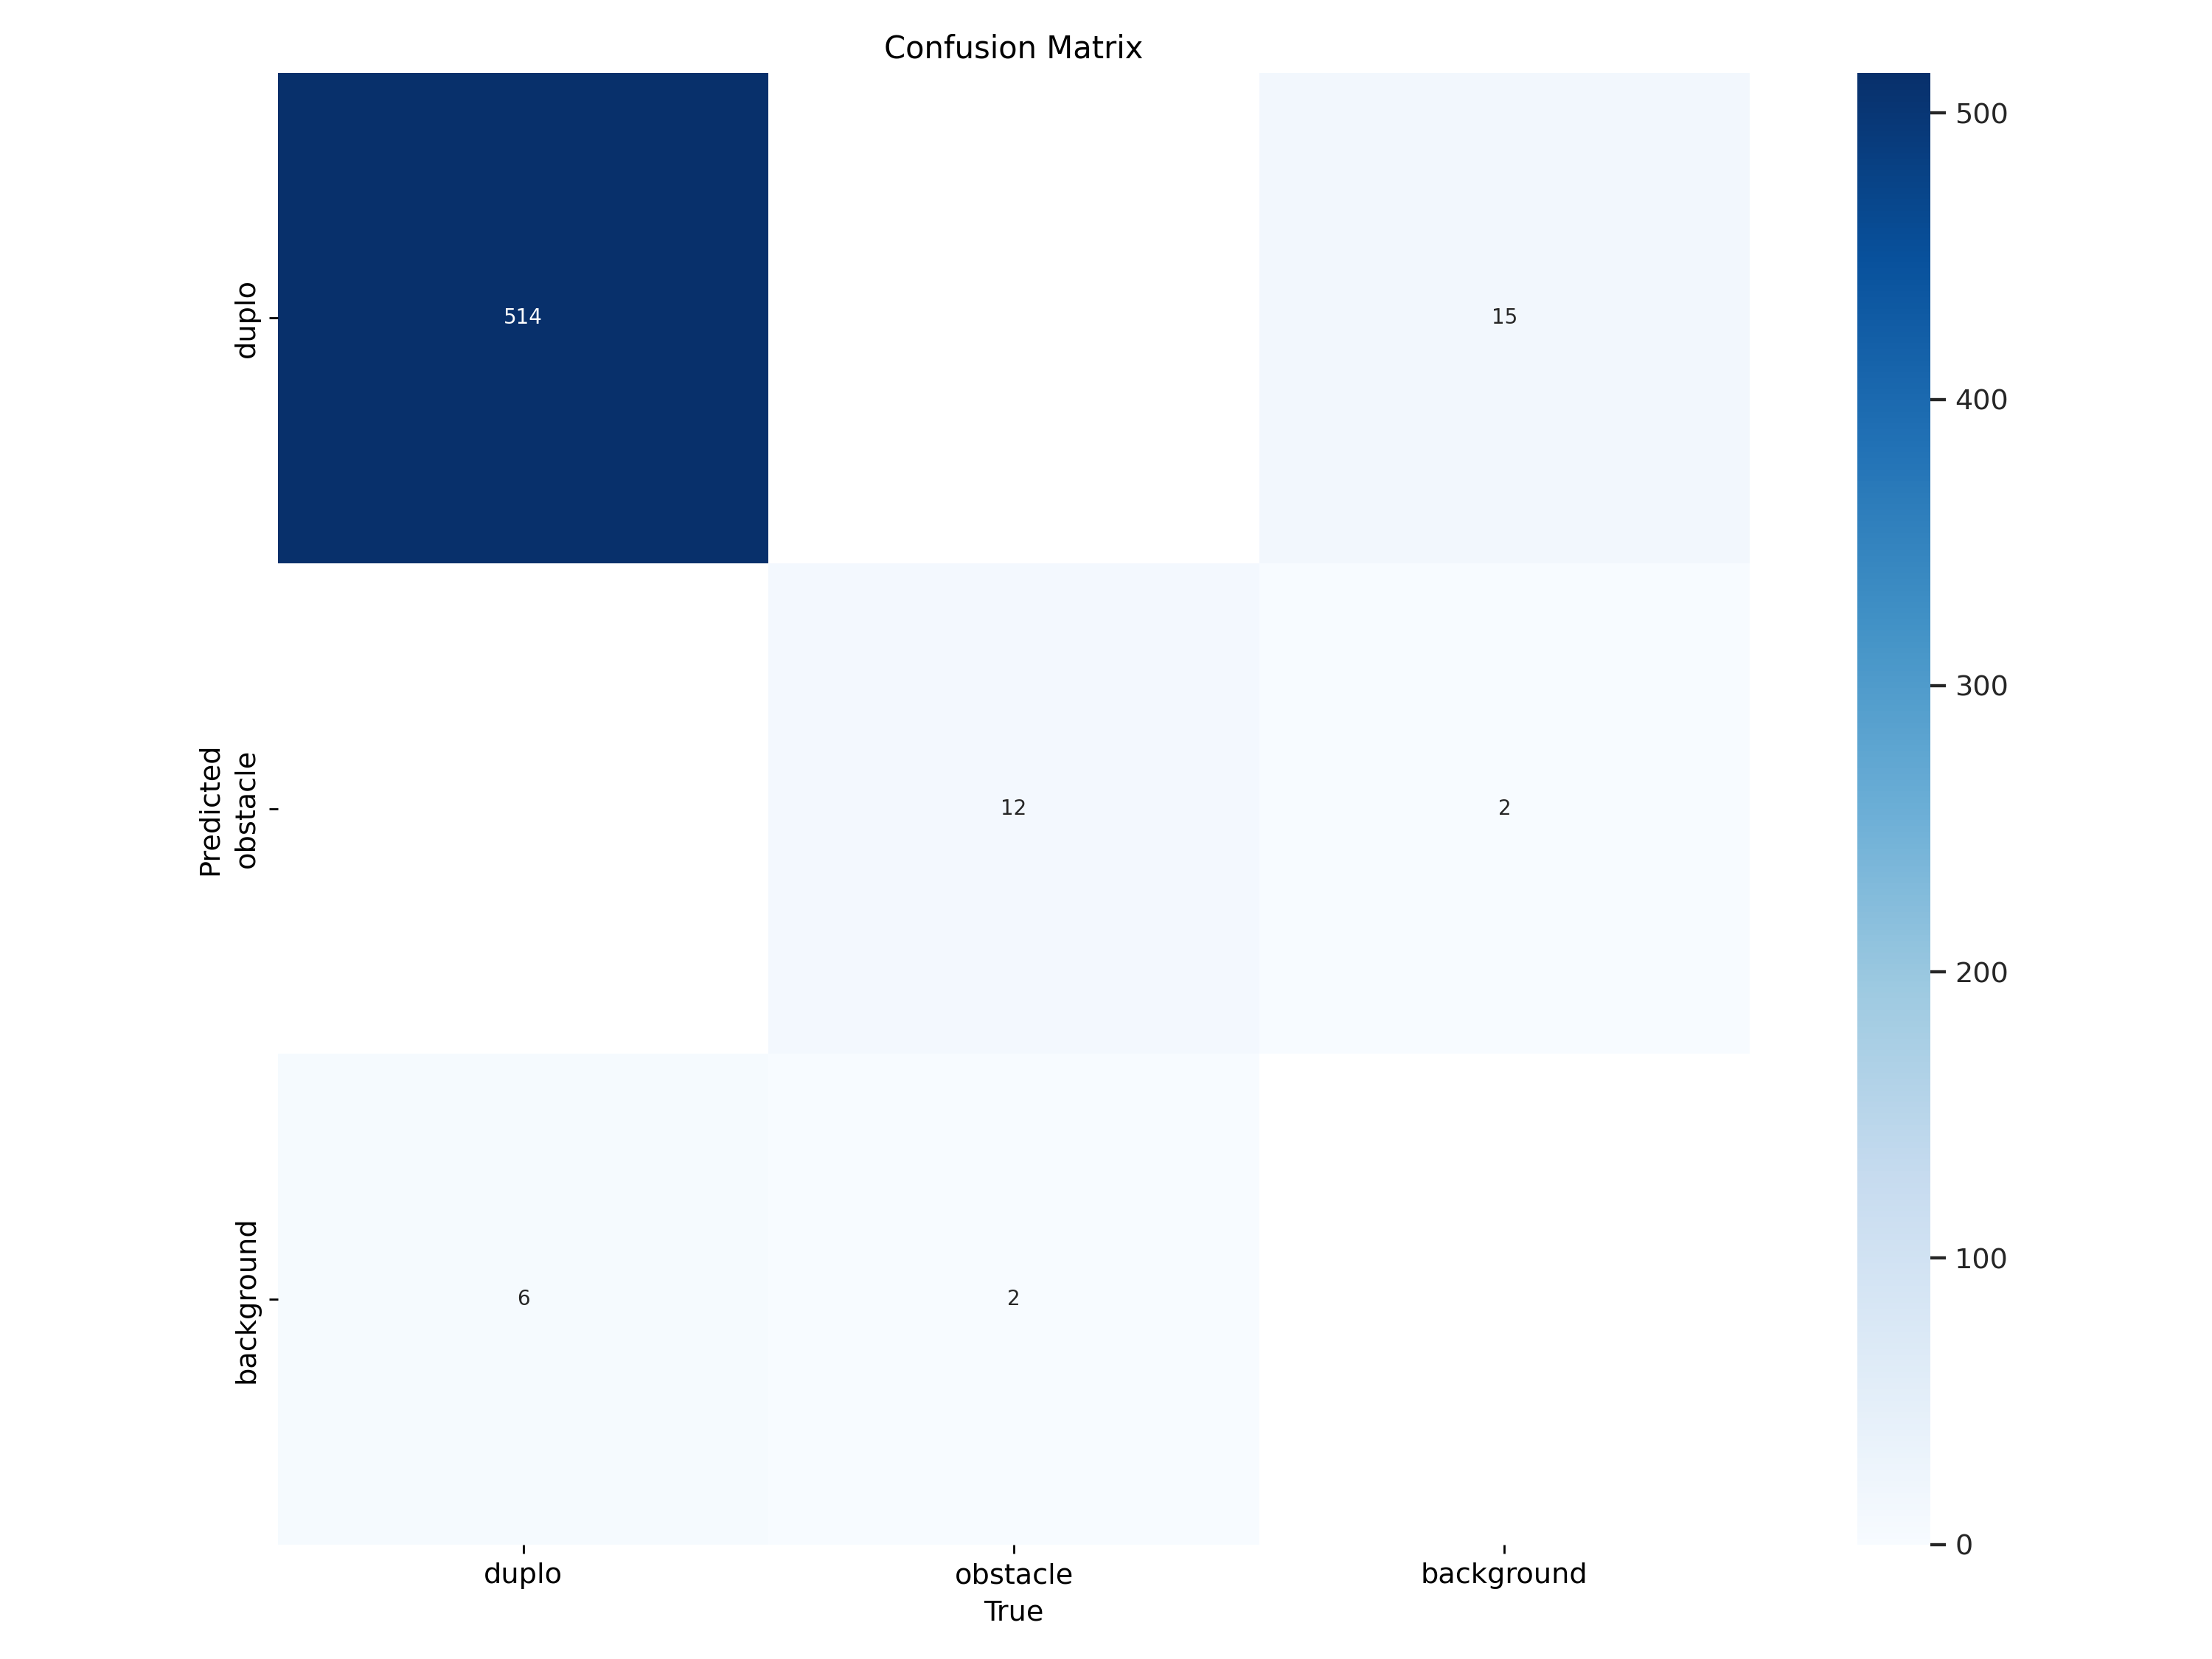

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

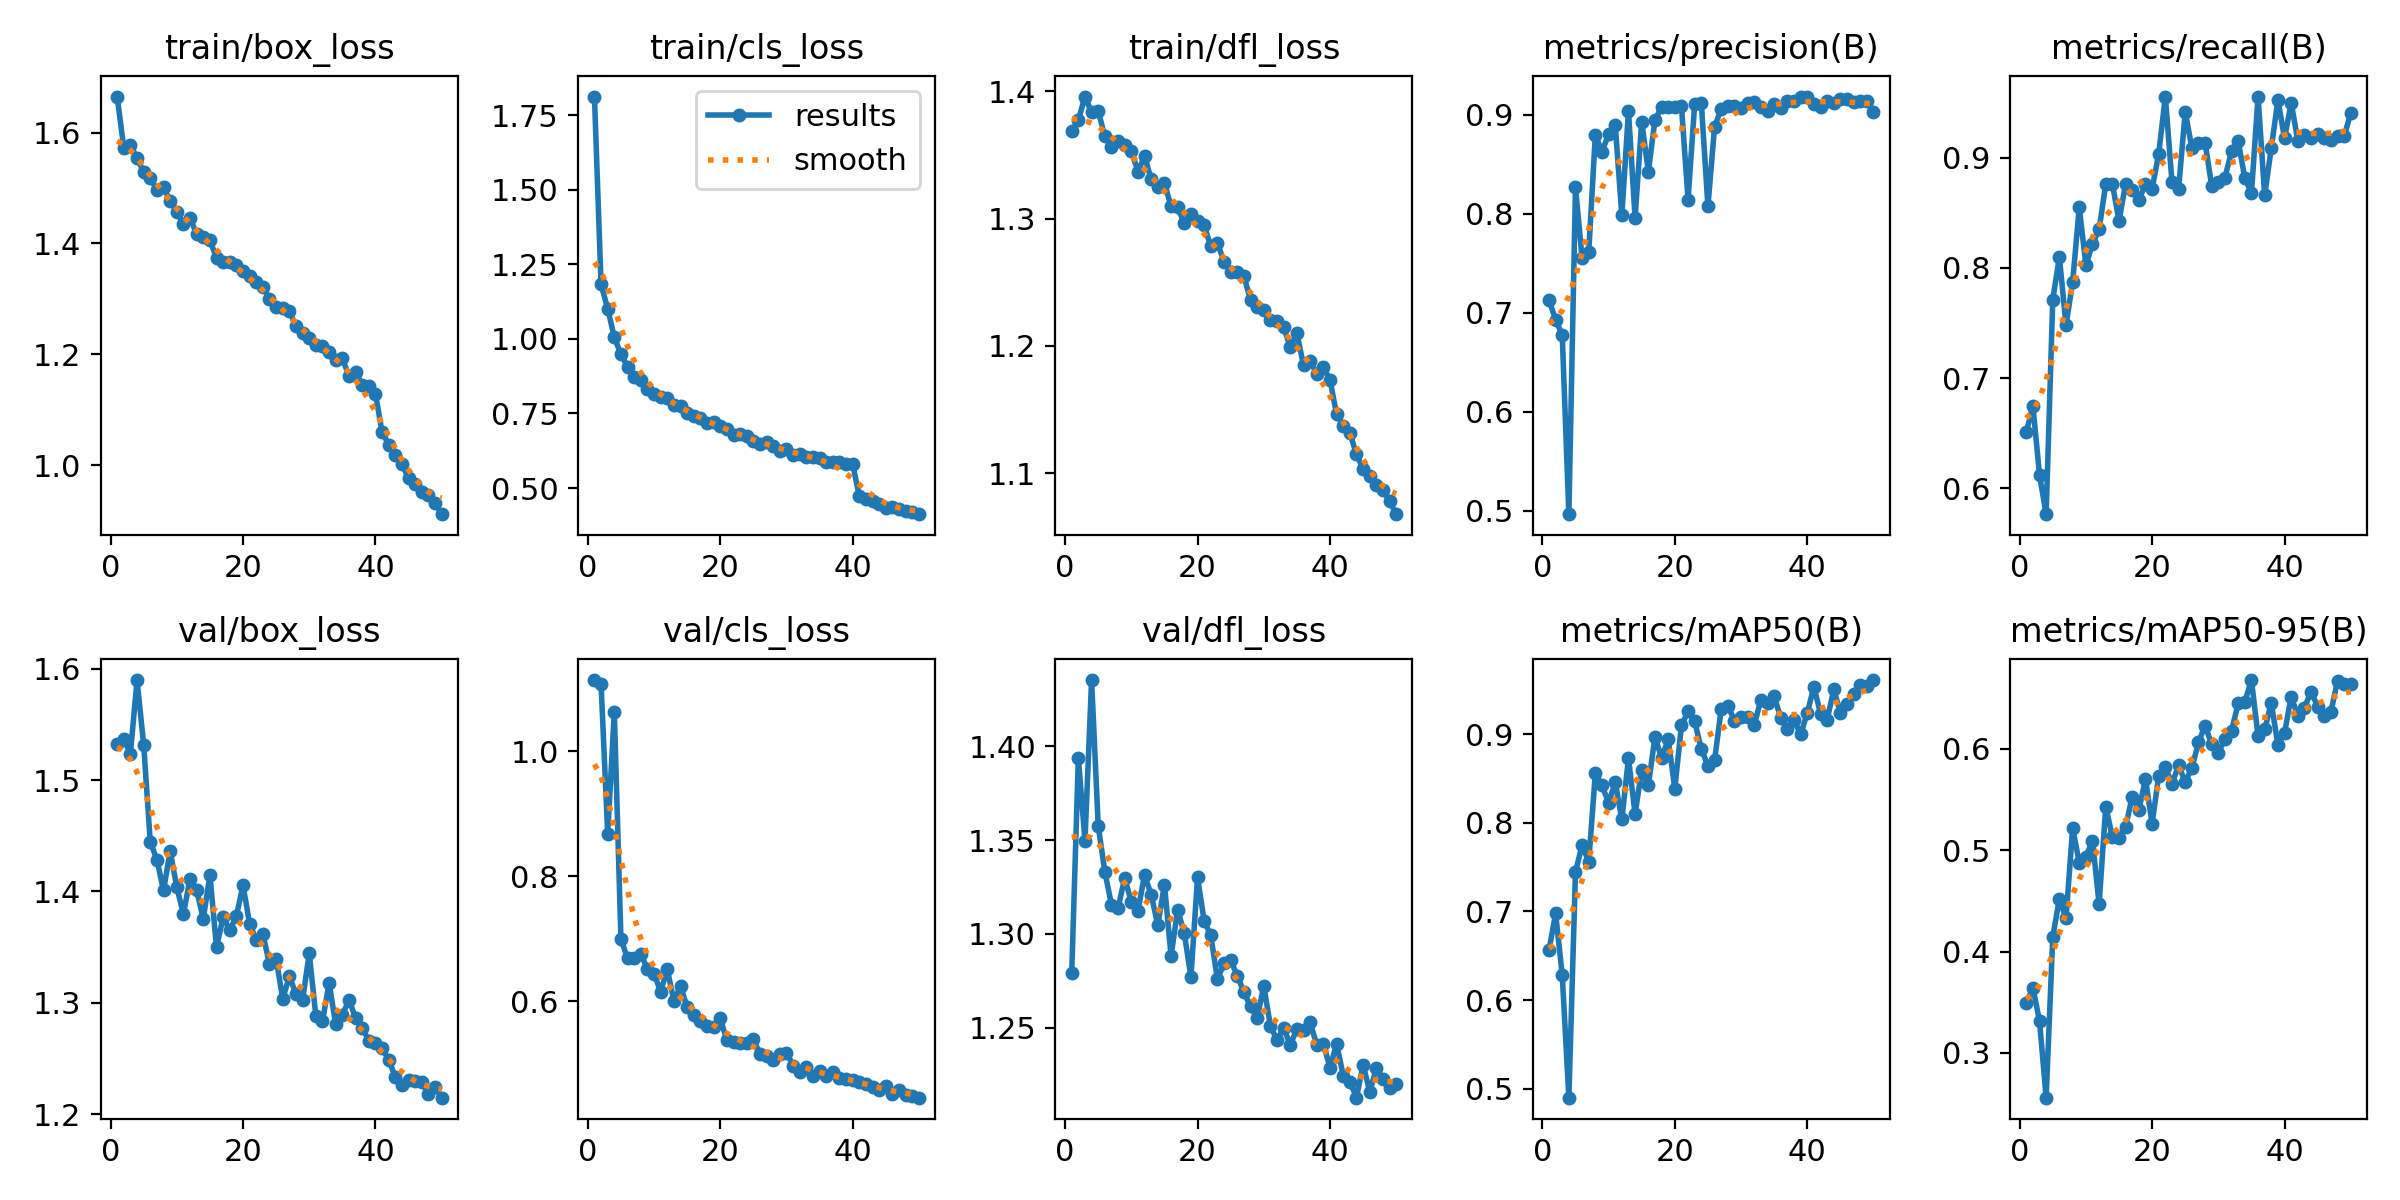

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

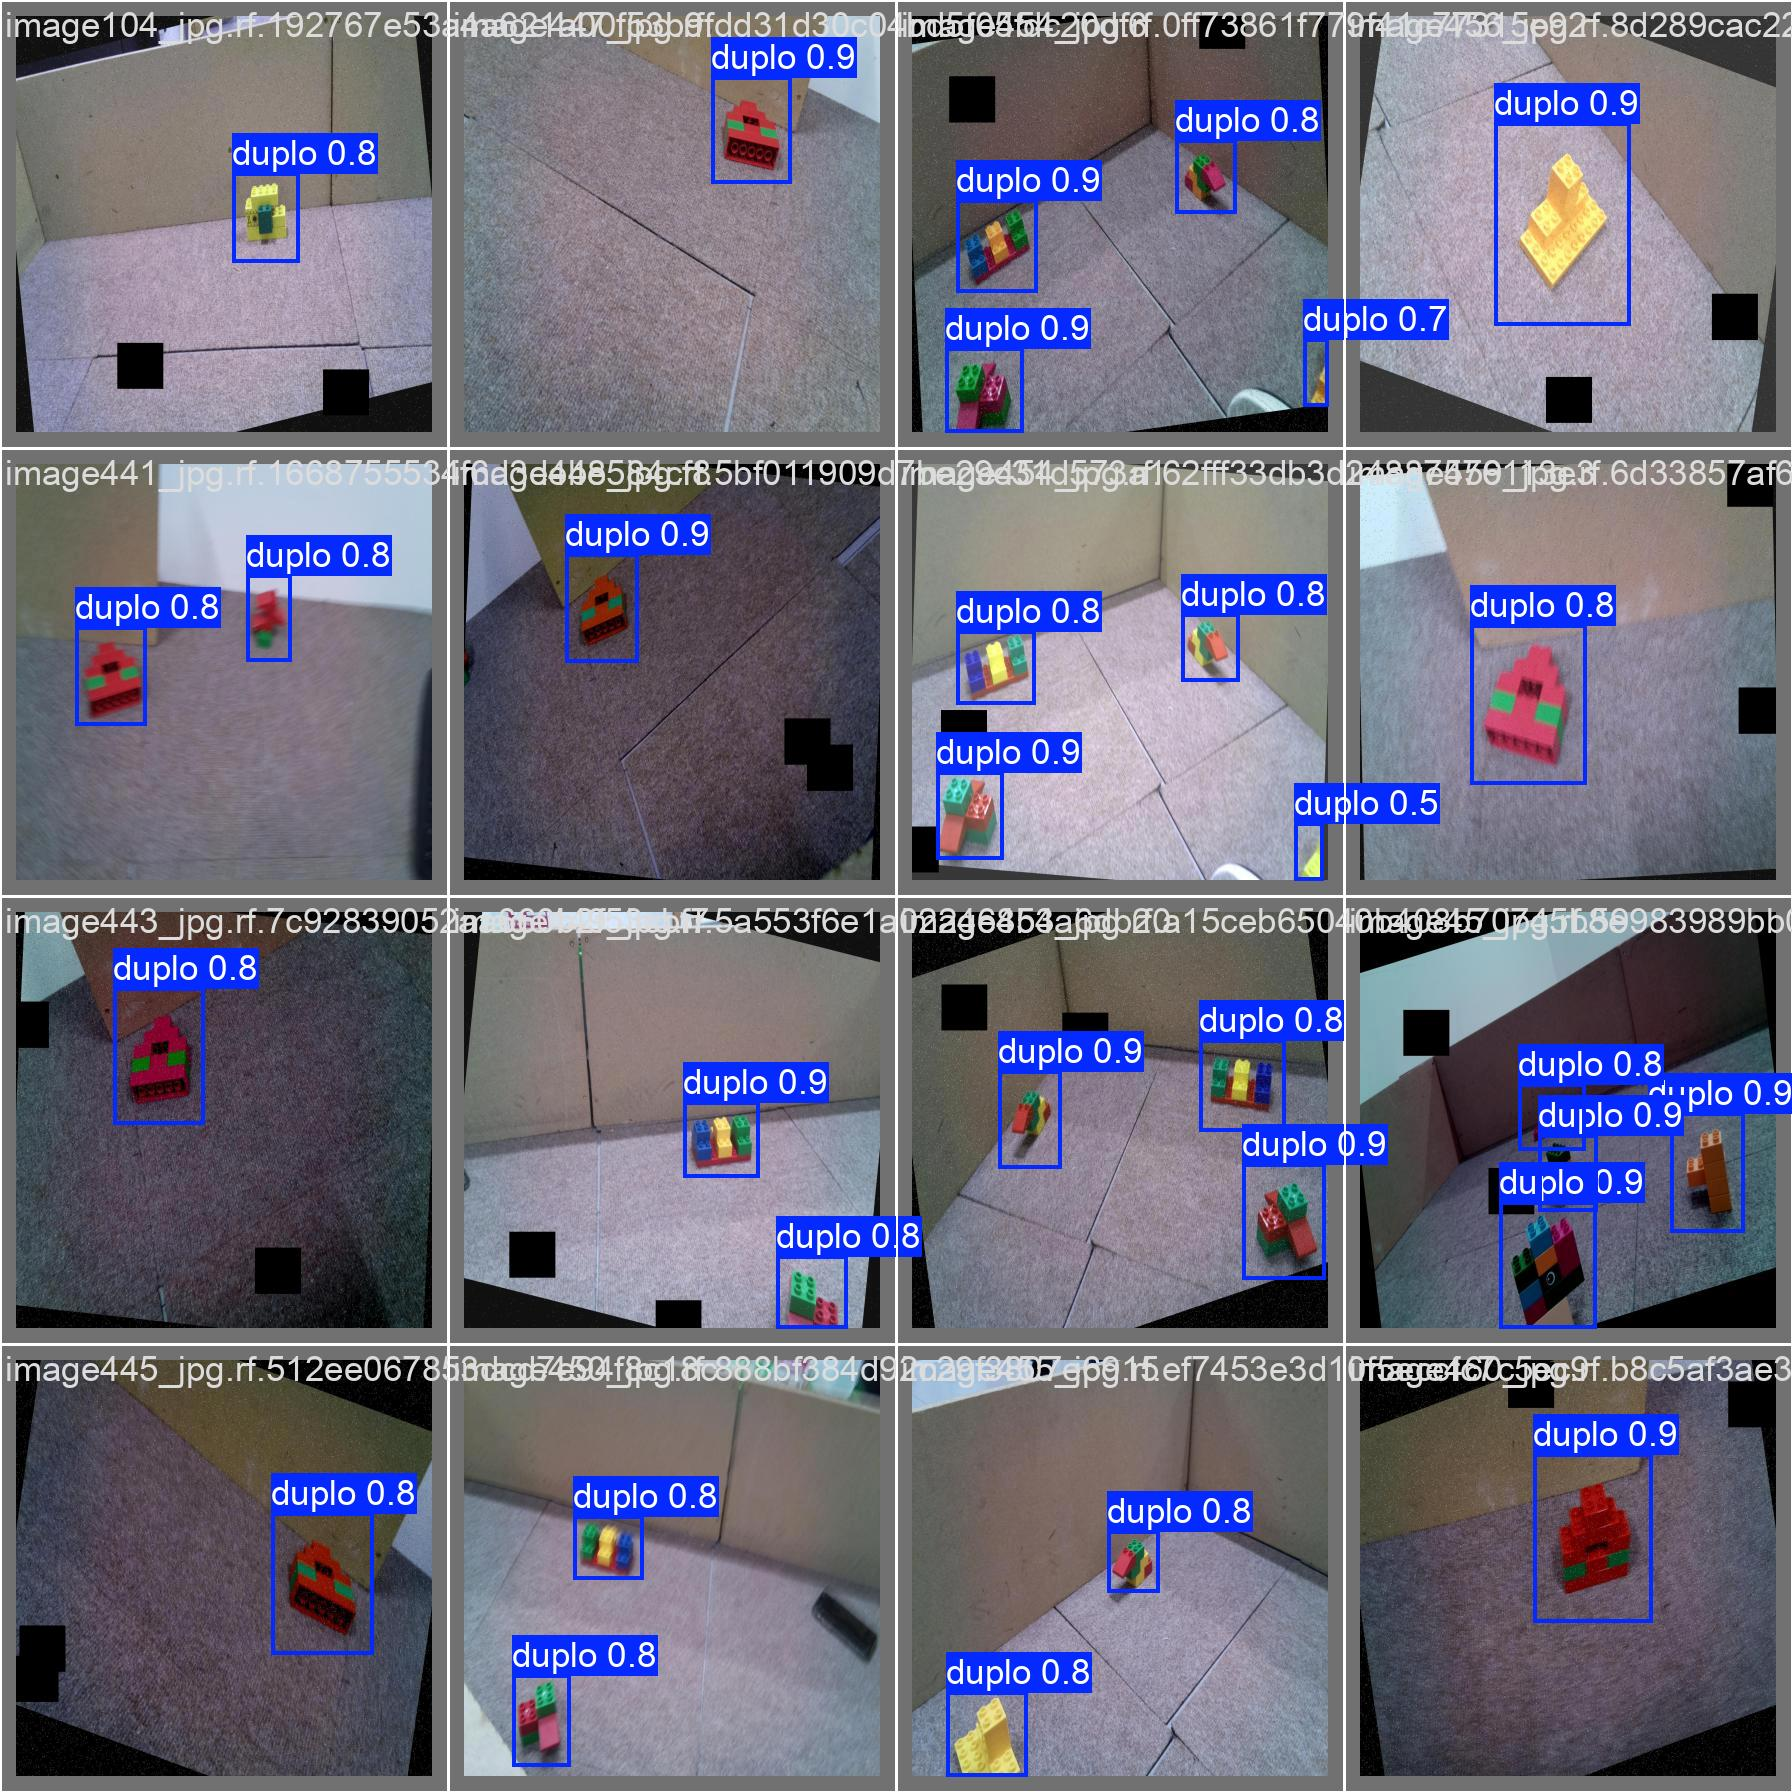

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/drive/MyDrive/yolov11/datasets/robocops_dupobs_detection-2/valid/labels.cache... 267 images, 0 backgrounds, 0 corrupt: 100% 267/267 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 17/17 [00:03<00:00,  4.51it/s]
                   all        267        534      0.915       0.92      0.955      0.666
                 duplo        267        520      0.973      0.987      0.993      0.643
              obstacle         14         14      0.857      0.853      0.917      0.689
Speed: 1.0ms preprocess, 3.3ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with custom model

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

image 1/134 /content/drive/MyDrive/yolov11/datasets/robocops_dupobs_detection-2/test/images/image103_jpg.rf.8dfbf9e4cc23cbafeef275a18ff264bc.jpg: 416x416 1 duplo, 23.3ms
image 2/134 /content/drive/MyDrive/yolov11/datasets/robocops_dupobs_detection-2/test/images/image105_jpg.rf.465444c57489898f72ccb342e1c23034.jpg: 416x416 1 duplo, 20.4ms
image 3/134 /content/drive/MyDrive/yolov11/datasets/robocops_dupobs_detection-2/test/images/image115_jpg.rf.f87eb969b2a4381f2fad8a9ccf3865e7.jpg: 416x416 2 duplos, 27.3ms
image 4/134 /content/drive/MyDrive/yolov11/datasets/robocops_dupobs_detection-2/test/images/image120_jpg.rf.e188df09cb90a2d005bde893057114f1.jpg: 416x416 4 duplos, 23.7ms
image 5/134 /content/drive/MyDrive/yolov11/datasets/robocops_dupobs_detection-2/test/images/image122_jpg.rf.a3a33cdb162969ee11bea6f847a168c7.jpg: 416x41

**NOTE:** Let's take a look at few results.

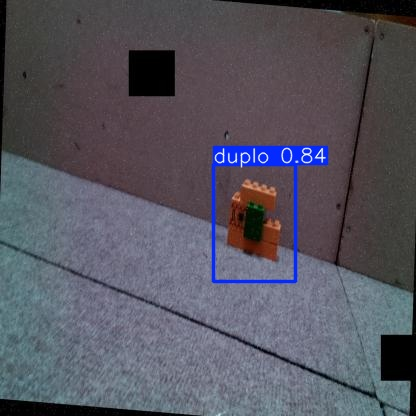

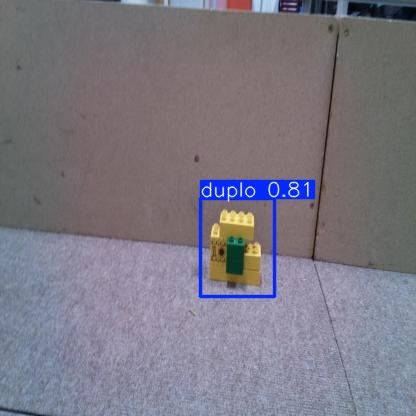

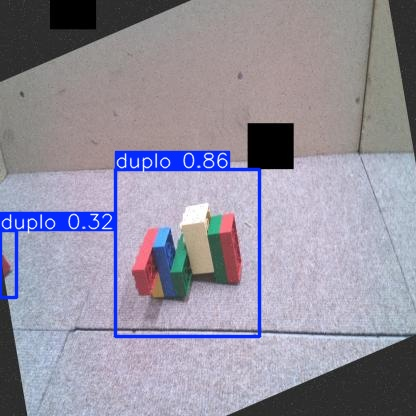

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")